In [ ]:
pip install arch

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize, LinearConstraint
from arch import arch_model
from sklearn.covariance import ledoit_wolf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
from multiprocessing import Pool, cpu_count
from numba import jit
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import time
#import ipdb
#from alpha_vantage.timeseries import TimeSeries
#import quandl

In [ ]:
import yfinance as yf
import time

# List of tickers

tickers = [
    # NASDAQ
    "AAPL", "MSFT", "AMZN", "INTC", "CSCO", "QCOM", "NVDA", "ADBE", "ORCL",
    "NTRS", "AMGN", "GILD", "BIIB", "SBUX", "ADSK", "ROST", "MCHP",
    "PAYX", "LRCX", "GWW", "XRAY", "INTU", "HON",  "NTAP", "SNPS", "CSGP",
    "PGR", "ETR", "VFC", "COP", "C","ORLY","MAR", "PCAR","CPRT","MNST",
    "CINF", "HBAN", "VRSN",

    # NYSE
    "JNJ", "JPM", "PG", "KO", "DIS", "XOM", "CVX", "BAC", "WMT", "EMR", "KMB",
    "PFE", "T", "VZ", "MRK", "IBM", "CAT", "MMM", "DHR", "RTX", "BK",
    "SRE", "APD", "GIS", "NKE", "UNH", "TGT", "TROW", "XEL", "NOC", "CVS",
    "BAX", "DOV", "HIG", "MDT", "GD", "BMY", "DTE", "AIG", "CL", "UDR",
    "ADP", "CAG", "AXP", "D", "HSIC", "SCHW", "GGG", "PRGO", "ASH", "SYK",
    "CUZ", "FI", "MMC", "EOG", "BDC", "SONY", "LOW", "BHP", "LMT", "BLK"
]

"""
10----------
tickers = [
    # NASDAQ
    "AAPL", "MSFT", "AMZN", "INTC", "CSCO",

    # NYSE
    "UNH", "SONY", "LOW", "LMT", "BLK"
]
------------------------------------------------------------------------------------------------------------------
30----------
tickers = [
    # NASDAQ
    "AAPL", "MSFT", "AMZN", "INTC", "CSCO", "QCOM", "NVDA", "ADBE", "ORCL",
    "NTRS", "AMGN", "ADSK",

    # NYSE
    "JNJ", "JPM", "PG", "KO", "DIS", "XOM", "EMR", "KMB",
    "SRE", "APD", "GIS", "NKE", "UNH", "SONY", "LOW", "BHP", "LMT", "BLK"
]
------------------------------------------------------------------------------------------------------------------
40--------
tickers = [
    # NASDAQ
    "AAPL", "MSFT", "AMZN", "INTC", "CSCO", "QCOM", "NVDA", "ADBE", "ORCL",
    "NTRS", "AMGN", "ADSK", "ROST", "MCHP", "PAYX", "LRCX",

    # NYSE
    "JNJ", "JPM", "PG", "KO", "DIS", "XOM", "CVX", "BAC", "WMT", "EMR", "KMB",
    "PFE", "MRK", "IBM",
    "SRE", "APD", "GIS", "NKE", "UNH", "SONY", "LOW", "BHP", "LMT", "BLK"
]
------------------------------------------------------------------------------------------------------------------
70
tickers = [
    # NASDAQ
    "AAPL", "MSFT", "AMZN", "INTC", "CSCO", "QCOM", "NVDA", "ADBE", "ORCL",
    "NTRS", "AMGN", "GILD", "BIIB", "SBUX", "ADSK", "ROST", "MCHP",
    "PAYX", "LRCX", "GWW", "XRAY", "INTU", "HON",  "NTAP", "SNPS", "CSGP",
    "CINF", "HBAN", "VRSN",

    # NYSE
    "JNJ", "JPM", "PG", "KO", "DIS", "XOM", "CVX", "BAC", "WMT", "EMR", "KMB",
    "PFE", "T", "VZ", "MRK", "IBM", "CAT", "MMM", "DHR", "RTX", "BK",
    "ADP", "CAG", "AXP", "D", "HSIC", "SCHW", "GGG", "PRGO", "ASH", "SYK",
    "CUZ", "FI", "MMC", "EOG", "BDC", "SONY", "LOW", "BHP", "LMT", "BLK"
]
------------------------------------------------------------------------------------------------------------------
100
tickers = [
    # NASDAQ
    "AAPL", "MSFT", "AMZN", "INTC", "CSCO", "QCOM", "NVDA", "ADBE", "ORCL",
    "NTRS", "AMGN", "GILD", "BIIB", "SBUX", "ADSK", "ROST", "MCHP",
    "PAYX", "LRCX", "GWW", "XRAY", "INTU", "HON",  "NTAP", "SNPS", "CSGP",
    "PGR", "ETR", "VFC", "COP", "C","ORLY","MAR", "PCAR","CPRT","MNST",
    "CINF", "HBAN", "VRSN",

    # NYSE
    "JNJ", "JPM", "PG", "KO", "DIS", "XOM", "CVX", "BAC", "WMT", "EMR", "KMB",
    "PFE", "T", "VZ", "MRK", "IBM", "CAT", "MMM", "DHR", "RTX", "BK",
    "SRE", "APD", "GIS", "NKE", "UNH", "TGT", "TROW", "XEL", "NOC", "CVS",
    "BAX", "DOV", "HIG", "MDT", "GD", "BMY", "DTE", "AIG", "CL", "UDR",
    "ADP", "CAG", "AXP", "D", "HSIC", "SCHW", "GGG", "PRGO", "ASH", "SYK",
    "CUZ", "FI", "MMC", "EOG", "BDC", "SONY", "LOW", "BHP", "LMT", "BLK"
]
------------------------------------------------------------------------------------------------------------------
50 --------
tickers = [
    # NASDAQ
    "AAPL", "MSFT", "AMZN", "INTC", "CSCO", "QCOM", "NVDA", "ADBE", "ORCL",
    "NTRS", "AMGN", "GILD", "BIIB", "SBUX", "ADSK", "ROST", "MCHP",
    "PAYX", "LRCX",

    # NYSE
    "JNJ", "JPM", "PG", "KO", "DIS", "XOM", "CVX", "BAC", "WMT", "EMR", "KMB",
    "PFE", "T", "VZ", "MRK", "IBM", "CAT", "MMM", "DHR", "RTX", "BK",
    "SRE", "APD", "GIS", "NKE", "UNH", "SONY", "LOW", "BHP", "LMT", "BLK"
]
"""

# Initialize a DataFrame to hold all the data
all_data = pd.DataFrame()

for ticker in tickers:
    try:
        # Fetch data using yfinance
        data = yf.download(ticker, start='2005-01-01', end='2013-12-31')
        if 'Close' in data.columns:
            all_data[ticker] = data['Close']
        else:
            print(f"'Close' column not found for {ticker}")
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
    time.sleep(1)  # Sleep for 1 second between requests to avoid rate limiting

# Check the DataFrame
print(all_data.head(), all_data.shape, all_data.info())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2005-01-03 to 2013-12-30
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2264 non-null   float64
 1   MSFT    2264 non-null   float64
 2   AMZN    2264 non-null   float64
 3   INTC    2264 non-null   float64
 4   CSCO    2264 non-null   float64
 5   QCOM    2264 non-null   float64
 6   NVDA    2264 non-null   float64
 7   ADBE    2264 non-null   float64
 8   ORCL    2264 non-null   float64
 9   NTRS    2264 non-null   float64
 10  AMGN    2264 non-null   float64
 11  GILD    2264 non-null   float64
 12  BIIB    2264 non-null   float64
 13  SBUX    2264 non-null   float64
 14  ADSK    2264 non-null   float64
 15  ROST    2264 non-null   float64
 16  MCHP    2264 non-null   float64
 17  PAYX    2264 non-null   float64
 18  LRCX    2264 non-null   float64
 19  GWW     2264 non-null   float64
 20  XRAY    2264 non-null   float64
 21  INTU    2264 non-n

In [ ]:
# check that data is sufficient
df = all_data
cols_data = [col for col in df.columns if df[col].notnull().sum() < 2200]
print(cols_data)

[]


In [ ]:
# remove missing data and check number of observations
all_data = all_data.dropna()
all_data.info(), all_data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2005-01-03 to 2013-12-30
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2264 non-null   float64
 1   MSFT    2264 non-null   float64
 2   AMZN    2264 non-null   float64
 3   INTC    2264 non-null   float64
 4   CSCO    2264 non-null   float64
 5   QCOM    2264 non-null   float64
 6   NVDA    2264 non-null   float64
 7   ADBE    2264 non-null   float64
 8   ORCL    2264 non-null   float64
 9   NTRS    2264 non-null   float64
 10  AMGN    2264 non-null   float64
 11  GILD    2264 non-null   float64
 12  BIIB    2264 non-null   float64
 13  SBUX    2264 non-null   float64
 14  ADSK    2264 non-null   float64
 15  ROST    2264 non-null   float64
 16  MCHP    2264 non-null   float64
 17  PAYX    2264 non-null   float64
 18  LRCX    2264 non-null   float64
 19  GWW     2264 non-null   float64
 20  XRAY    2264 non-null   float64
 21  INTU    2264 non-n

(None,
                  AAPL       MSFT       AMZN       INTC       CSCO       QCOM  \
 Date                                                                           
 2005-01-03   1.130179  26.740000   2.226000  23.070000  19.320000  42.320000   
 2005-01-04   1.141786  26.840000   2.107000  22.610001  18.559999  42.130001   
 2005-01-05   1.151786  26.780001   2.088500  22.389999  18.570000  42.310001   
 2005-01-06   1.152679  26.750000   2.052500  22.459999  18.850000  43.000000   
 2005-01-07   1.236607  26.670000   2.116000  22.799999  18.719999  43.220001   
 ...               ...        ...        ...        ...        ...        ...   
 2013-12-23  20.360357  36.619999  20.146000  25.320000  21.570000  72.839996   
 2013-12-24  20.273930  37.080002  19.959999  25.430000  21.690001  73.040001   
 2013-12-26  20.139286  37.439999  20.219500  25.700001  21.799999  73.480003   
 2013-12-27  20.003214  37.290001  19.903999  25.600000  22.020000  73.800003   
 2013-12-30  19.80428

In [ ]:
# check if all columns have values and no missing or NaN entries
missing_values = all_data.isna().any().any()
zero_values = (all_data == 0).any().any()
print(f"Missing values present: {missing_values}")
print(f"Zero values present: {zero_values}")

Missing values present: False
Zero values present: False


In [ ]:
# find the return
r_all = all_data.pct_change() * 100
r_all = r_all.dropna()
r_all_df = pd.DataFrame(r_all, index=r_all.index, columns=r_all.columns)
r_all.shape

(2263, 100)

In [ ]:
r_all

,AAPL,MSFT,AMZN,INTC,CSCO,QCOM,NVDA,ADBE,ORCL,NTRS,...,CUZ,FI,MMC,EOG,BDC,SONY,LOW,BHP,LMT,BLK
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,1.026999,0.373973,-5.345910,-1.993928,-3.933749,-0.448957,-4.707379,-2.642239,-2.609988,-0.864431,...,-0.332227,-1.274368,0.303947,-1.577766,-1.198936,-1.834149,-2.087645,-3.862479,-1.697101,-0.303505
2005-01-05,0.875820,-0.223545,-0.878030,-0.973026,0.053881,0.427250,0.934575,-0.549454,0.306278,-0.382816,...,-2.366667,0.506203,-0.909089,-0.839699,-3.325842,-0.131577,-0.845814,0.309053,2.514543,-0.926545
2005-01-06,0.077531,-0.112026,-1.723726,0.312638,1.507812,1.630817,-0.969837,-1.657455,0.916030,1.174208,...,1.570499,0.730297,-3.119267,1.478070,-2.092054,-0.184452,0.319887,1.100350,-0.219665,6.880430
2005-01-07,7.281124,-0.299065,3.093785,1.513803,-0.689661,0.511631,-1.914866,0.068092,0.832070,-1.603710,...,-0.504204,0.249996,-1.325758,-0.652405,0.047484,0.897572,0.372009,-0.087071,0.476981,-2.075005
2005-01-10,-0.418724,0.487436,-1.134212,0.350877,0.000000,-0.161961,0.227142,0.068052,-1.050265,-0.364576,...,0.000000,-1.421446,-0.319899,1.572997,1.328907,1.386705,2.082598,0.087147,0.419937,2.361509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-23,3.837750,-0.489131,0.179012,1.037511,2.082350,-0.096019,0.573610,0.354375,1.539734,0.789343,...,-0.579153,0.968351,-0.083110,-0.534067,1.665954,1.138957,0.896394,0.484919,0.589412,0.343582
2013-12-24,-0.424490,1.256152,-0.923264,0.434442,0.556332,0.274581,0.253490,0.100887,1.056050,0.016313,...,-0.291263,-0.034253,0.415888,0.381816,0.720444,-1.745492,0.619833,1.131049,0.744521,0.247289
2013-12-26,-0.664122,0.970865,1.300103,1.061740,0.507140,0.602413,-0.948166,0.083996,0.991423,0.668842,...,-0.097371,0.873740,0.082835,-0.142631,-0.196353,-0.802300,0.677614,-0.417533,1.847541,-0.256166


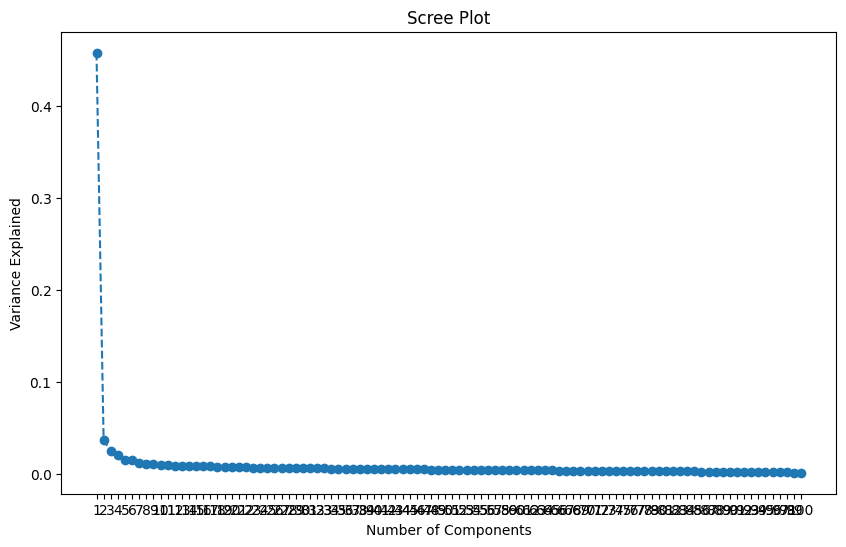

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# scree test to find K - components
# scale data
scaler = StandardScaler()
r_all_scaled = scaler.fit_transform(r_all_df)

# Perform PCA
pca = PCA()
pca.fit(r_all_scaled)

# Get the explained variance
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')

# Set x-ticks to show each component number
plt.xticks(range(1, len(explained_variance) + 1))

plt.show()


In [ ]:
# fcuntoin for PCA and get matching data to future training
def combined_rolling_pca(data, train_window_size, forecast_window_size, n_components):
    u_list, f_list, b_list, r_list = [], [], [], []
    u_forecast_list, f_forecast_list, b_forecast_list, r_forecast_list = [], [], [], []

    # Calculate the number of windows
    num_windows = (len(data) - train_window_size) // forecast_window_size

    for i in range(num_windows):
        # Define the start and end of the training window
        start_idx = i * forecast_window_size
        end_idx = start_idx + train_window_size

        # Extract the training window
        train_window = data.iloc[start_idx:end_idx]

        # Perform PCA on the training window
        pca = PCA(n_components=n_components)
        pca.fit(train_window)

        # Store PCA results for the training window
        f_train = pca.transform(train_window)
        b_train = pca.components_.T
        reconstructed_train = np.dot(f_train, b_train.T)
        u_train = train_window.values - reconstructed_train

        u_list.append(u_train)
        f_list.append(f_train)
        b_list.append(b_train)
        r_list.append(train_window.values)

        # Define the start and end of the forecast window
        forecast_start_idx = end_idx
        forecast_end_idx = forecast_start_idx + forecast_window_size

        # Extract the forecast window
        forecast_window = data.iloc[forecast_start_idx:forecast_end_idx]

        # Perform PCA on the forecast window
        f_forecast = pca.transform(forecast_window)
        b_forecast = pca.components_.T
        reconstructed_forecast = np.dot(f_forecast, b_forecast.T)
        u_forecast = forecast_window.values - reconstructed_forecast

        # Store PCA results for the forecast window
        u_forecast_list.append(u_forecast)
        f_forecast_list.append(f_forecast)
        b_forecast_list.append(b_forecast)
        r_forecast_list.append(forecast_window.values)

    return (np.array(u_list), np.array(f_list), np.array(b_list), np.array(r_list),
            np.array(u_forecast_list), np.array(f_forecast_list), np.array(b_forecast_list), np.array(r_forecast_list))

window_size = len(r_all_df) - (252*3)
n_components = 5 # 50 assets, K = 4; # 70 assets, K = 5; 40 assets, K = 4; 30 assets, K = 4; 10 assets, K = 2; 100 assets, K = 5
step_size = 21

(u_array, f_array, b_array, r_stacked,
 u_forecast_array, f_forecast_array, b_forecast_array, r_forecast_array) = combined_rolling_pca(r_all_df, window_size, step_size, n_components)

print("u shape:", u_array.shape)
print("f shape:", f_array.shape)
print("b shape:", b_array.shape)
print("aligned data shape:", r_stacked.shape)

print("u forecast shape:", u_forecast_array.shape)
print("f forecast shape:", f_forecast_array.shape)
print("b forecast shape:", b_forecast_array.shape)
print("r forecast shape:", r_forecast_array.shape)

u shape: (36, 1507, 100)
f shape: (36, 1507, 5)
b shape: (36, 100, 5)
aligned data shape: (36, 1507, 100)
u forecast shape: (36, 21, 100)
f forecast shape: (36, 21, 5)
b forecast shape: (36, 100, 5)
r forecast shape: (36, 21, 100)


In [ ]:
# needed to make y values of garch larger than 1, for optimsiation can return values after GARCH
u_array = u_array * 10

# fit garch function
def fit_garch_and_forecast(data):
    model = arch_model(data, vol='Garch', p=1, q=1)
    result = model.fit(disp='off')
    forecast = result.forecast(horizon=21)
    return result.conditional_volatility, forecast.variance.values[-1]

def process_asset(args):
    asset_data, ticker, window_index = args
    volatility, forecast = fit_garch_and_forecast(asset_data)
    return ticker, volatility, forecast, window_index

num_windows, window_size, num_assets = u_array.shape # get number of windows, size and number of assets from errors var

d_list = []
d_forecast_list = []

for window_index in range(num_windows):
    # Prepare data for multiprocessing, calculate windows
    asset_data_list = [(u_array[window_index, :, i], f"Asset_{i}", window_index) for i in range(num_assets)]

    # Use multiprocessing to fit GARCH models and calculate volatilities and forecasts
    with Pool(processes=cpu_count()) as pool:
        results = pool.map(process_asset, asset_data_list) # This applies the process_asset
                                                           # function to each item in asset_data_list.

    # Combine results for this window
    d_window = np.zeros((window_size, num_assets))
    d_forecast_window = np.zeros((21, num_assets))

    for ticker, volatility, forecast, _ in results:
        asset_index = int(ticker.split('_')[1])
        d_window[:, asset_index] = volatility
        d_forecast_window[:, asset_index] = np.sqrt(forecast)

    d_list.append(d_window)
    d_forecast_list.append(d_forecast_window)

# Stack all windows vertically
d = np.vstack(d_list)
d_forecast = np.vstack(d_forecast_list)

# rescale values back
u_array /= 10
d /= 10
d_forecast /= 10

print("d shape:", d.shape)
print("d_forecast shape:", d_forecast.shape)


d shape: (54252, 100)
d_forecast shape: (756, 100)


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct  3 17:59:28 2021

@author: Patrick Ledoit
"""

# function sigmahat=GIS(Y,k)
#
# Y (N*p): raw data matrix of N iid observations on p random variables
# sigmahat (p*p): invertible covariance matrix estimator
#
# Implements the geometric-inverse shrinkage (QIS) estimator
#    This is a nonlinear shrinkage estimator based on the Symmetrized
#    Kullback-Leibler loss; it can be viewed as geometrically averaging
#    linear-inverse shrinkage (LIS) with quadratic-inverse shrinkage (QIS)
#
# If the second (optional) parameter k is absent, not-a-number, or empty,
# then the algorithm demeans the data by default, and adjusts the effective
# sample size accordingly. If the user inputs k = 0, then no demeaning
# takes place; if (s)he inputs k = 1, then it signifies that the data Y has
# already been demeaned.
#
# This version: 01/2021

###########################################################################
# This file is released under the BSD 2-clause license.

# Copyright (c) 2021, Olivier Ledoit and Michael Wolf
# All rights reserved.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are
# met:
#
# 1. Redistributions of source code must retain the above copyright notice,
# this list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright
# notice, this list of conditions and the following disclaimer in the
# documentation and/or other materials provided with the distribution.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS
# IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO,
# THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR
# PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR
# CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL,
# EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO,
# PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR
# PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF
# LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING
# NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
# SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
###########################################################################

### EXTRACT sample eigenvalues sorted in ascending order and eigenvectors ###
def QIS(Y,k=None):
    #Pre-Conditions: Y is a valid pd.dataframe and optional arg- k which can be
    #    None, np.nan or int
    #Post-Condition: Sigmahat dataframe is returned

    #Set df dimensions
    N = Y.shape[0]                                              #num of columns
    p = Y.shape[1]                                                 #num of rows

    #default setting
    if (k is None or math.isnan(k)):
        Y = Y.sub(Y.mean(axis=0), axis=1)                               #demean
        k = 1

    #vars
    n = N-k                                      # adjust effective sample size
    c = p/n                                               # concentration ratio

    #Cov df: sample covariance matrix
    sample = pd.DataFrame(np.matmul(Y.T.to_numpy(),Y.to_numpy()))/n
    sample = (sample+sample.T)/2                              #make symmetrical

    #Spectral decomp
    lambda1, u = np.linalg.eig(sample)                     #use LAPACK routines
    lambda1 = lambda1.real           #clip imaginary part due to rounding error
    u = u.real                            #clip imaginary part for eigenvectors

    lambda1 = lambda1.real.clip(min=0)              #reset negative values to 0
    dfu = pd.DataFrame(u,columns=lambda1)   #create df with column names lambda
    #                                        and values u
    dfu.sort_index(axis=1,inplace = True)              #sort df by column index
    lambda1 = dfu.columns                              #recapture sorted lambda

    #COMPUTE Quadratic-Inverse Shrinkage estimator of the covariance matrix
    h = (min(c**2,1/c**2)**0.35)/p**0.35                   #smoothing parameter
    invlambda = 1/lambda1[max(1,p-n+1)-1:p]  #inverse of (non-null) eigenvalues
    dfl = pd.DataFrame()
    dfl['lambda'] = invlambda
    Lj = dfl[np.repeat(dfl.columns.values,min(p,n))]          #like  1/lambda_j
    Lj = pd.DataFrame(Lj.to_numpy())                        #Reset column names
    Lj_i = Lj.subtract(Lj.T)                    #like (1/lambda_j)-(1/lambda_i)

    theta = Lj.multiply(Lj_i).div(Lj_i.multiply(Lj_i).add(
        Lj.multiply(Lj)*h**2)).mean(axis = 0)          #smoothed Stein shrinker
    Htheta = Lj.multiply(Lj*h).div(Lj_i.multiply(Lj_i).add(
        Lj.multiply(Lj)*h**2)).mean(axis = 0)                    #its conjugate
    Atheta2 = theta**2+Htheta**2                         #its squared amplitude

    if p<=n:               #case where sample covariance matrix is not singular
         delta = 1 / ((1-c)**2*invlambda+2*c*(1-c)*invlambda*theta \
                      +c**2*invlambda*Atheta2)    #optimally shrunk eigenvalues
         delta = delta.to_numpy()
    else:
        delta0 = 1/((c-1)*np.mean(invlambda.to_numpy())) #shrinkage of null
        #                                                 eigenvalues
        delta = np.repeat(delta0,p-n)
        delta = np.concatenate((delta, 1/(invlambda*Atheta2)), axis=None)

    deltaQIS = delta*(sum(lambda1)/sum(delta))                  #preserve trace

    temp1 = dfu.to_numpy()
    temp2 = np.diag(deltaQIS)
    temp3 = dfu.T.to_numpy().conjugate()
    #reconstruct covariance matrix
    sigmahat = pd.DataFrame(np.matmul(np.matmul(temp1,temp2),temp3))
    return sigmahat

#Data input (Change path to match your own here)


#sigmahat = QIS(Y)         #function call

#display output
pd.options.display.float_format = "{:,.16f}".format
#print(sigmahat)
#save output (Change path to match your own here)

In [ ]:
# functions to calculate all needed variables for DCC
def construct_D(d):
    # D is a diagonla matrix with the diagonal values found with d_i
    T, N = d.shape
    D = np.zeros((N, N, T))
    for t in range(T):
        D[:, :, t] = np.diag(d[t, :])
    return D

def construct_C(s, window_size=window_size):
    # sample cov and apply nl shrinakge
    num_windows = s.shape[0] // window_size
    N = s.shape[1]  # number of assets
    C = np.zeros((N, N, num_windows))

    for i in range(num_windows):
        start = i * window_size
        end = (i + 1) * window_size
        Y = pd.DataFrame(s[start:end])
        Y = Y.astype(float)
        sigmahat = QIS(Y)  # apply nl shrinakge
        sigma = np.diag(np.sqrt(np.diag(sigmahat)))
        sigma_inv = np.linalg.inv(sigma)
        C[:, :, i] = sigma_inv @ sigmahat @ sigma_inv

    return C

def DCC_var(d, u_array):
    t , n = d.shape
    u = u_array.reshape(t, n) # stack windows on top of eachother
    s = u / d
    D = construct_D(d)
    Y = pd.DataFrame(s)
    Y = Y.astype(float)
    C = construct_C(s)
    return s, D, C, u
s, D, C, u = DCC_var(d, u_array)
s.shape, D.shape, C.shape, u.shape
# ((167240, 10), (10, 10, 167240), (10, 10, 36), (167240, 10))

((54252, 100), (100, 100, 54252), (100, 100, 36), (54252, 100))

In [ ]:
# compare to this, some variables will be stacked
D.shape, s.shape, C.shape, u.shape, d.shape
# ((30, 30, 5030), (5030, 30), (30, 30), (5030, 30), (5030, 30))

((100, 100, 54252), (54252, 100), (100, 100, 36), (54252, 100), (54252, 100))

In [ ]:
params_array = pd.read_csv('params_array_50_f.csv').values

In [ ]:
def dcc_f(s, alpha, beta, C, D):
    T, N = s.shape
    Qt = np.zeros((N, N, T))
    Rt = np.zeros((N, N, T))
    Ht = np.zeros((N, N, T))
    Qt[:, :, 0] = C
    Rt[:, :, 0] = np.eye(N)
    for t in range(1, T):
        Qt[:, :, t] = (1 - alpha - beta) * C + alpha * (s[t-1].reshape(-1, 1) @ s[t-1].reshape(1, -1)) + beta * Qt[:, :, t-1]
        diag_elements = np.copy(np.diag(Qt[:, :, t]))
        diag_elements[diag_elements <= 0] = 1e-10
        Q_inv_sqrt = np.diag(1 / np.sqrt(diag_elements))
        Rt[:, :, t] = Q_inv_sqrt @ Qt[:, :, t] @ Q_inv_sqrt
        Ht[:, :, t] = D[:, :, t] @ Rt[:, :, t] @ D[:, :, t]
    return Ht

@jit(nopython=True)
def composite_likelihood(Rt, s):
    likConst = 3.67575413281869
    T, N = s.shape
    ll_neg = 0.0
    eps = 1e-10
    for t in range(T):
        St = Rt[:,:,t]
        for i in range(N - 1):
            j = i + 1
            s11, s22 = St[i, i], St[j, j]
            s12 = St[i, j]
            x11 = np.sum(s[:, i] * s[:, i])
            x12 = np.sum(s[:, i] * s[:, j])
            x22 = np.sum(s[:, j] * s[:, j])
            det = max((s11 * s22) - (s12 ** 2), eps)
            ll_part_neg = 0.5 * (likConst + np.log(det) + (s22*x11 - 2*s12*x12 + s11*x22) / det)
            ll_neg += ll_part_neg
    return ll_neg / T

def objective_function(params, s, C, D, window_index):
    alpha, beta = params
    if alpha + beta >= 1 or alpha + beta < 0:
        return np.inf
    Ht = dcc_f(s_window, alpha, beta, C_window, D_window)
    ll_neg = composite_likelihood(Ht, s_window)
    return ll_neg

def estimate_dcc_parameters(s, C, D, window_index):
    rng = np.random.default_rng()  # Create a new random number generator
    initial_alpha = rng.uniform(0.01, 0.02) # ranadom starting points for a and b
    initial_beta = rng.uniform(0.4, 0.6)    # between specific values
    #linear_constraint = LinearConstraint([[1, 1]], [-np.inf], [1])
    initial_params = [initial_alpha, initial_beta]
    bounds = [(0.01, 0.98), (0.01, 0.98)]
    #options = {'disp': False, 'maxiter': 15, 'ftol': 1e-3, 'gtol': 1e-3} # -- L-BFGS-B
    #options = {'disp': False, 'maxiter': 20, 'ftol': 1e-3}  # -- SLSQP
    options = {'disp': False, 'maxfev': 15, 'xatol': 1e-3, 'adaptive': True} # -- Nelder-Mead
    result = minimize(objective_function, initial_params, args=(s_window, C_window, D_window, window_index), method='Nelder-Mead',
                      bounds=bounds, options=options)
    return result.x

# Prepare arguments for multiprocessing
args_list = []
num_windows = (s.shape[0] / window_size)
#for i in range(int(num_windows)):
for i in range(int(num_windows)):
    start_idx = i * step_size
    end_idx = start_idx + window_size
    s_window = np.ascontiguousarray(s[start_idx:end_idx])
    C_window = np.ascontiguousarray(C[:, :, i])
    D_window = np.ascontiguousarray(D[:, :, start_idx:end_idx])
    args_list.append((i, s_window, C_window, D_window))

def process_window(args):
    window_index, s_window, C_window, D_window = args
    print(f"Starting estimation for window {window_index}")

    params = estimate_dcc_parameters(s_window, C_window, D_window, window_index)
    return params

print("Starting parameter estimation for all windows")

# Use multiprocessing to process all windows
with Pool(processes=cpu_count()) as pool:
    params_list = pool.map(process_window, args_list)

params_array = np.array(params_list)
print("Estimated parameters shape:", params_array.shape)
print("Parameter estimation completed for all windows")

Starting parameter estimation for all windows
Starting estimation for window 0
Starting estimation for window 5
Starting estimation for window 6
Starting estimation for window 1
Starting estimation for window 7
Starting estimation for window 2
Starting estimation for window 3
Starting estimation for window 8
Starting estimation for window 4
Starting estimation for window 9
Starting estimation for window 10
Starting estimation for window 15
Starting estimation for window 11
Starting estimation for window 16
Starting estimation for window 12
Starting estimation for window 17
Starting estimation for window 18
Starting estimation for window 13
Starting estimation for window 19
Starting estimation for window 14
Starting estimation for window 20
Starting estimation for window 25
Starting estimation for window 21
Starting estimation for window 26
Starting estimation for window 22
Starting estimation for window 27
Starting estimation for window 23
Starting estimation for window 28
Starting est

In [ ]:
params_array

array([[0.01      , 0.51007676],
       [0.01      , 0.36644471],
       [0.01      , 0.29654039],
       [0.01      , 0.40571924]])

In [ ]:
# Given arrays
win1_2 = np.array([[0.01, 0.39470942],
                   [0.01, 0.50204035]])
win3_4 = np.array([[0.01, 0.53428225],
                   [0.01, 0.40620675]])
win5_10 = np.array([[0.01003828, 0.6061049],
                    [0.01, 0.24847772],
                    [0.01, 0.52381537],
                    [0.01, 0.24004261],
                    [0.01, 0.49507303],
                    [0.01, 0.54646312]])
win11_14 = np.array([[0.01, 0.51007676],
                     [0.01, 0.36644471],
                     [0.01, 0.29654039],
                     [0.01, 0.40571924]])

# Combine all windows into one array
all_windows = np.vstack((win1_2, win3_4, win5_10, win11_14))

# Calculate the average for alpha and beta
average_alpha_beta = np.mean(all_windows, axis=0)

# Create the final array
final_array = np.zeros((36, 2))

# Set window 0 and windows 15-35 to the average
final_array[0] = average_alpha_beta
final_array[15:] = average_alpha_beta

# Set windows 1-14 with the existing values
final_array[1:15] = all_windows
params_array = final_array
print(final_array)


[[0.01000273 0.43399976]
 [0.01       0.39470942]
 [0.01       0.50204035]
 [0.01       0.53428225]
 [0.01       0.40620675]
 [0.01003828 0.6061049 ]
 [0.01       0.24847772]
 [0.01       0.52381537]
 [0.01       0.24004261]
 [0.01       0.49507303]
 [0.01       0.54646312]
 [0.01       0.51007676]
 [0.01       0.36644471]
 [0.01       0.29654039]
 [0.01       0.40571924]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]
 [0.01000273 0.43399976]]


In [ ]:
params_df = pd.DataFrame(params_array, columns=['Alpha', 'Beta'])

# Save the DataFrame to a CSV file
params_df.to_csv('params_array_70_nee.csv', index=False)

# Download the CSV file to your local machine
from google.colab import files
files.download('params_array_70_nee.csv')

In [ ]:
u_array.shape

(36, 1507, 40)

In [ ]:
num_windows

36

In [ ]:
# find u values realted to forecast
u_forecast_stacked = np.zeros((u_array.shape[0], step_size, u_array.shape[2]))
for i in range(1, u_array.shape[0]):  # Start from 1 to skip the first window
    u_forecast_stacked[i] = u_array[i, :step_size, :]

# update new variabels realted to froecast
def DCC_var_for(d, u_array, C):
    t , n = d.shape
    u = u_array.reshape(t, n) # stack windows on top of eachother
    s = u / d
    D = construct_D(d)
    C_stacked = C.reshape(r_all.shape[1] * int(num_windows), r_all.shape[1])
    return s, D, u, C_stacked
s_for, D_for, u_for, C_for = DCC_var_for(d_forecast, u_forecast_stacked, C)
s_for.shape, D_for.shape, u_for.shape, C_for.shape

((756, 100), (100, 100, 756), (756, 100), (3600, 100))

In [ ]:
def dcc_ht(s, alpha, beta, C, D):
    T, N = s.shape
    Qt = np.zeros((N, N, T))
    Rt = np.zeros((N, N, T))
    Ht = np.zeros((N, N, T))
    Qt[:, :, 0] = C
    Rt[:, :, 0] = np.eye(N)
    for t in range(1, T):
        Qt[:, :, t] = (1 - alpha - beta) * C + alpha * (s[t-1].reshape(-1, 1) @ s[t-1].reshape(1, -1)) + beta * Qt[:, :, t-1]
        diag_elements = np.copy(np.diag(Qt[:, :, t]))
        diag_elements[diag_elements <= 0] = 1e-10
        Q_inv_sqrt = np.diag(1 / np.sqrt(diag_elements))
        Rt[:, :, t] = Q_inv_sqrt @ Qt[:, :, t] @ Q_inv_sqrt
        Ht[:, :, t] = D[:, :, t] @ Rt[:, :, t] @ D[:, :, t]
    return Ht

In [ ]:
# find relevant vars
for window_index in range(u_array.shape[0]):
    # Extract the first 21 entries starting from index 1 for the current window
    u_forecast_stacked[window_index] = u_array[window_index, 1:22, :]
s_forecast, D_forecast, u_forcast, C_forecast = DCC_var_for(d_forecast, u_forecast_stacked, C)
s_forecast.shape, D_forecast.shape, C_forecast.shape, u_forcast.shape

((756, 100), (100, 100, 756), (3600, 100), (756, 100))

In [ ]:
u_forcast.shape

(756, 30)

In [ ]:
params_array

array([[0.01000273, 0.43399976],
       [0.01      , 0.39470942],
       [0.01      , 0.50204035],
       [0.01      , 0.53428225],
       [0.01      , 0.40620675],
       [0.01003828, 0.6061049 ],
       [0.01      , 0.24847772],
       [0.01      , 0.52381537],
       [0.01      , 0.24004261],
       [0.01      , 0.49507303],
       [0.01      , 0.54646312],
       [0.01      , 0.51007676],
       [0.01      , 0.36644471],
       [0.01      , 0.29654039],
       [0.01      , 0.40571924],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.01000273, 0.43399976],
       [0.

In [ ]:
# dcc for forecasting ht
def dcc_ht(s, alpha, beta, C, D):
    T, N = s.shape
    Qt = np.zeros((N, N, T))
    Rt = np.zeros((N, N, T))
    Ht = np.zeros((N, N, T))
    Qt[:, :, 0] = C
    Rt[:, :, 0] = np.eye(N)

    for t in range(T):
        if t == 0:
            Qt[:, :, t] = (1 - alpha - beta) * C + beta * Qt[:, :, t-1]
        else:
            Qt[:, :, t] = (1 - alpha - beta) * C + alpha * (s[t-1].reshape(-1, 1) @ s[t-1].reshape(1, -1)) + beta * Qt[:, :, t-1]
        diag_elements = np.copy(np.diag(Qt[:, :, t]))
        diag_elements[diag_elements <= 0] = 1e-10
        Q_inv_sqrt = np.diag(1 / np.sqrt(diag_elements))
        Rt[:, :, t] = Q_inv_sqrt @ Qt[:, :, t] @ Q_inv_sqrt
        Ht[:, :, t] = D[:, :, t] @ Rt[:, :, t] @ D[:, :, t]

    return Ht

In [ ]:
Ht_forecast_list = []  # list to store the results of each dcc_ht call

for i in range(int(num_windows)):
    alpha, beta = params_array[i]
    print('a en b', alpha, beta)
    print('i', i)
    start_idx = i * step_size
    end_idx = start_idx + step_size
    s_forecast_window = np.ascontiguousarray(s_forecast[start_idx:end_idx])
    C_forecast_window = np.ascontiguousarray(C[:, :, i])
    D_forecast_window = np.ascontiguousarray(D_forecast[:, :, start_idx:end_idx])
    #args_list.append((i, s_forecast_window, C_forecast_window, D_forecast_window))

    # Call dcc_ht and store the result in Ht_forecast
    Ht_forecast = dcc_ht(s_forecast_window, alpha, beta, C_forecast_window, D_forecast_window)

    # Append Ht_forecast to Ht_forecast_list
    Ht_forecast_list.append(Ht_forecast)

a en b 0.010002734285714285 0.4339997585714285
i 0
a en b 0.01 0.39470942
i 1
a en b 0.01 0.50204035
i 2
a en b 0.01 0.53428225
i 3
a en b 0.01 0.40620675
i 4
a en b 0.01003828 0.6061049
i 5
a en b 0.01 0.24847772
i 6
a en b 0.01 0.52381537
i 7
a en b 0.01 0.24004261
i 8
a en b 0.01 0.49507303
i 9
a en b 0.01 0.54646312
i 10
a en b 0.01 0.51007676
i 11
a en b 0.01 0.36644471
i 12
a en b 0.01 0.29654039
i 13
a en b 0.01 0.40571924
i 14
a en b 0.010002734285714285 0.4339997585714285
i 15
a en b 0.010002734285714285 0.4339997585714285
i 16
a en b 0.010002734285714285 0.4339997585714285
i 17
a en b 0.010002734285714285 0.4339997585714285
i 18
a en b 0.010002734285714285 0.4339997585714285
i 19
a en b 0.010002734285714285 0.4339997585714285
i 20
a en b 0.010002734285714285 0.4339997585714285
i 21
a en b 0.010002734285714285 0.4339997585714285
i 22
a en b 0.010002734285714285 0.4339997585714285
i 23
a en b 0.010002734285714285 0.4339997585714285
i 24
a en b 0.010002734285714285 0.43399975857

In [ ]:
Ht_forecast_array = np.stack(Ht_forecast_list, axis=0)
print('First 10x10 of first entry :\n', Ht_forecast_array[0, :10, :10, 0])
print('Last 10x10 slice of the first entry :\n', Ht_forecast_array[0, :10, :10, -1])
print('First 10x10 slice of second entry:\n', Ht_forecast_array[1, :10, :10, 0])


First 10x10 of first entry :
 [[ 1.27092569e+00  1.94075075e-02  1.69119557e-01  4.15160586e-02
   8.82264774e-02  6.74213565e-02  1.02117760e-01  3.86157002e-02
   8.26007424e-02 -1.53064769e-02]
 [ 1.94075075e-02  1.09247283e+00  1.11347738e-01  9.67454722e-02
   1.70495670e-01  3.30719143e-02 -8.32894243e-02  1.26221623e-01
   1.51600552e-01  4.66866172e-02]
 [ 1.69119557e-01  1.11347738e-01  4.38000855e+00 -5.58785288e-02
   7.72270985e-02  1.25840662e-01 -2.95720183e-01 -6.08876416e-02
   2.58262067e-02 -3.93054183e-02]
 [ 4.15160586e-02  9.67454722e-02 -5.58785288e-02  1.18525066e+00
   1.71197651e-01  9.39176249e-02  2.89076329e-01  6.04041281e-02
   1.06838638e-01 -4.49222286e-02]
 [ 8.82264774e-02  1.70495670e-01  7.72270985e-02  1.71197651e-01
   1.88762853e+00  1.27767880e-01  1.85130313e-01  7.84782024e-02
   2.11081085e-01 -2.68571320e-02]
 [ 6.74213565e-02  3.30719143e-02  1.25840662e-01  9.39176249e-02
   1.27767880e-01  1.91509385e+00  8.42502121e-02 -2.94202684e-03
   

In [ ]:
# chekc that ht is valid and no matrices are empty
zero_matrices = np.sum(np.all(Ht_forecast_array == 0, axis=(2, 3)))
print(f"Number of zero matrices: {zero_matrices}")

# Count NaNs and infinities
nan_count = np.isnan(Ht_forecast_array).sum()
inf_count = np.isinf(Ht_forecast_array).sum()
print(f"Number of NaNs: {nan_count}, Number of Infinities: {inf_count}")

# Function to check if a matrix is positive definite
def is_positive_definite(matrix):
    try:
        np.linalg.cholesky(matrix)
        return True
    except np.linalg.LinAlgError:
        return False

# Check for symmetry and positive definiteness
for i in range(Ht_forecast_array.shape[0]):
    for j in range(Ht_forecast_array.shape[3]):  # Iterate over the 21 days
        matrix = Ht_forecast_array[i, :, :, j]

        # Check symmetry
        if not np.allclose(matrix, matrix.T, atol=1e-8):
            print(f"Matrix at window {i}, day {j} is not symmetric.")

        # Check positive definiteness
        if not is_positive_definite(matrix):
            print(f"Matrix at window {i}, day {j} is not positive definite.")

Number of zero matrices: 0
Number of NaNs: 0, Number of Infinities: 0


In [ ]:
Ht_forecast_array.shape

(36, 100, 100, 21)

In [ ]:
# find Sigma_u
Sigma_u = np.mean(Ht_forecast_array, axis=3)
print("Sigma_u shape:", Sigma_u.shape, Sigma_u[0])

Sigma_u shape: (36, 100, 100) [[ 1.68986434e+00  1.68222248e-02  2.47488694e-01 ...  3.10394863e-02
  -3.50866977e-02 -1.20274596e-01]
 [ 1.68222248e-02  1.13684588e+00  1.30937116e-01 ... -6.67683068e-02
  -9.71185542e-03  6.62001836e-04]
 [ 2.47488694e-01  1.30937116e-01  6.43096490e+00 ...  7.54851502e-02
  -3.08128830e-02 -1.70112978e-01]
 ...
 [ 3.10394863e-02 -6.67683068e-02  7.54851502e-02 ...  1.20937642e+00
  -7.61622614e-02  1.03231259e-01]
 [-3.50866977e-02 -9.71185542e-03 -3.08128830e-02 ... -7.61622614e-02
   7.06833929e-01  4.83066740e-03]
 [-1.20274596e-01  6.62001836e-04 -1.70112978e-01 ...  1.03231259e-01
   4.83066740e-03  2.26968207e+00]]


In [ ]:
# find sigma r ----> Sigma_r = B Sigma_f B' + Sigma_u
B = b_forecast_array
f = f_forecast_array

# define sigma r
Sigma_r = np.zeros((Ht_forecast_array.shape[0], Ht_forecast_array.shape[2], Ht_forecast_array.shape[2]))

# find sigma r for all 36 windows
for t in range(36):
    # Calculate the sample covariance matrix of f at time t
    f_t = f[t]
    f_t_reshaped = f_t.reshape(-1, f_t.shape[-1])
    Sigma_f_t = np.cov(f_t_reshaped, rowvar=False)

    # Reshape B at time t for matrix multiplication
    B_t = B[t]

    # Calculate sigma_r at time t using the formula: sigma_r = B * sigma_f * B.T + sigma_u
    Sigma_r[t] = B_t @ Sigma_f_t @ B_t.T + Sigma_u[t]

Sigma_r.shape


(36, 100, 100)

In [ ]:
Sigma_r.T.shape

(30, 30, 36)

In [ ]:
def GMV_weights(Ht):

    N, _, T = Ht.shape
    w = np.zeros((N, T))

    for t in range(T):
        Ht_t = Ht[:, :, t]

        # Check if the matrix is singular
        if np.linalg.cond(Ht_t) > 1e15:
            print(f"Matrix at time {t} is ill-conditioned.")
            continue

        # Compute w
        Ht_inv = np.linalg.inv(Ht_t)
        ones = np.ones(N)
        numerator_w = Ht_inv @ ones
        denominator_w = ones.T @ Ht_inv @ ones
        w[:, t] = numerator_w / denominator_w

    return w

weights_gmv  = GMV_weights(Sigma_r.T)
weights_gmv.shape, weights_gmv[-2]

((100, 36),
 array([0.03775585, 0.03135727, 0.04675254, 0.04335561, 0.04181528,
        0.05864818, 0.05348015, 0.04685576, 0.03958303, 0.03507785,
        0.03242117, 0.02050703, 0.02506153, 0.03077514, 0.03114351,
        0.05135474, 0.05252769, 0.09415314, 0.07032366, 0.06212574,
        0.07219757, 0.05688627, 0.0673335 , 0.03156769, 0.02931038,
        0.01951582, 0.03170704, 0.0455247 , 0.07554844, 0.10673914,
        0.03979198, 0.03598988, 0.04643161, 0.05398606, 0.02467476,
        0.03376973]))

In [ ]:
def calculate_momentum_signal(returns, window_size, forecast_step, look_back=252, exclude_recent=21):
    returns = returns.to_numpy() if isinstance(returns, pd.DataFrame) else returns
    T, N = returns.shape
    num_windows = (T - window_size) // forecast_step
    momentum_signals = np.zeros((N, num_windows))

    for window_index in range(num_windows):
        start = window_size - (window_size - look_back) + (window_index * forecast_step)
        end = start - window_size - exclude_recent
        if end > T:
            break

        # Calculate the geometric average of returns over the look-back period, excluding recent returns
        look_back_returns = returns[start:end-exclude_recent, :]
        print(f"Window {window_index}: look_back_returns = {look_back_returns}")
        print(window_index)
        print('hier', look_back_returns)

        # Convert percentage returns to decimal form
        decimal_returns = look_back_returns / 100.0

        # Ensure returns are valid for log1p
        decimal_returns = np.clip(decimal_returns, -0.999, None)  # Clip to avoid log of non-positive numbers

        # Use log returns to calculate the geometric mean to avoid overflow/underflow
        log_returns = np.log1p(decimal_returns)
        sum_log_returns = np.sum(log_returns, axis=0)

        # Calculate the geometric mean
        geometric_mean = np.expm1(sum_log_returns / (look_back - exclude_recent))
        print(f"Window {window_index}: geometric_mean = {geometric_mean}")

        momentum_signals[:, window_index] = geometric_mean

    return momentum_signals

def optimise_portfolio_with_momentum(Ht, r, b, window_size, forecast_step):
    N, _, T = Ht.shape
    m = calculate_momentum_signal(r, window_size, forecast_step)
    num_windows = min(m.shape[1], T)  # Ensure the number of windows does not exceed available Ht windows
    weights_m = np.zeros((N, num_windows))

    for window_index in range(num_windows):
        Ht_t = Ht[:, :, window_index]

        # Skip singular matrices
        if np.linalg.det(Ht_t) == 0:
            print(f"Matrix at window {window_index} is singular and cannot be inverted.")
            continue

        Ht_inv = np.linalg.inv(Ht_t)
        ones = np.ones(N)
        m_t = m[:, window_index]

        A = ones.T @ Ht_inv @ ones
        B = ones.T @ Ht_inv @ (m_t)
        C = m_t.T @ Ht_inv @ m_t

        c1 = (C - b * B) / (A * C - B**2)
        c2 = (b * A - B) / (A * C - B**2)
        print(window_index)
        print('A', A)
        print('B', B)
        print('C', C)
        print('c1', c1)
        print('c2', c2)
        weights_m[:, window_index] = c1 * (Ht_inv @ ones) + c2 * (Ht_inv @ m_t)
        tolerance = 1e-8  # adjust this value as needed
        if np.abs((weights_m[:, window_index].T @ m_t) - b) > tolerance:
            print(f"Constraint violation at window {window_index}: w' * m = {weights_m[:, window_index].T @ m_t}, expected {b}")

        print('m', m_t)

    return weights_m

# Example parameters
b = 0.02

# Call the function with your data
weights_m = optimise_portfolio_with_momentum(Sigma_r.T, r_all, b, window_size, step_size)
print(weights_m.shape)


Window 0: look_back_returns = [[ 0.29431218  0.48434858 -0.69356858 ...  2.25714663  1.46342113
   0.16513789]
 [-0.78696385  0.07415817  0.84656006 ... -2.03967832  0.06202432
  -1.0807843 ]
 [ 2.58131691 -0.2964058   0.46170647 ...  1.96805649  1.47241883
   2.24073905]
 ...
 [ 6.20753807 -1.6086993  -0.31640228 ...  5.07962127  4.54140652
  -1.17279211]
 [-3.10698167 -1.32567056  0.93457897 ...  1.59394353  3.49233723
   1.20982663]
 [-0.58555728  1.2987054  -2.56813132 ...  1.02880283 -1.25808308
   4.83478474]]
0
hier [[ 0.29431218  0.48434858 -0.69356858 ...  2.25714663  1.46342113
   0.16513789]
 [-0.78696385  0.07415817  0.84656006 ... -2.03967832  0.06202432
  -1.0807843 ]
 [ 2.58131691 -0.2964058   0.46170647 ...  1.96805649  1.47241883
   2.24073905]
 ...
 [ 6.20753807 -1.6086993  -0.31640228 ...  5.07962127  4.54140652
  -1.17279211]
 [-3.10698167 -1.32567056  0.93457897 ...  1.59394353  3.49233723
   1.20982663]
 [-0.58555728  1.2987054  -2.56813132 ...  1.02880283 -1.2580

In [ ]:
weights_m.shape, weights_gmv.shape

((50, 36), (50, 36))

In [ ]:
# Equal-Weighted Portfolio
equal_weights = np.ones(r_stacked.shape[2]) / r_stacked.shape[2]
equal_weights.shape

(100,)

In [ ]:
weights_gmv = weights_gmv.T
weights_m = weights_m.T
weights_gmv[-1], weights_m[-1], equal_weights

(array([ 3.21521477e-02,  6.84995950e-03,  6.91215886e-03,  2.00864680e-03,
        -2.05634217e-03,  2.76667407e-02, -1.69259869e-02, -4.86838568e-03,
        -1.87990957e-03, -5.47252078e-03, -9.34155805e-03,  1.98728332e-03,
        -1.35130998e-03, -5.64541443e-03, -7.96861025e-03,  1.79947688e-02,
         2.67166864e-02,  4.66883814e-03,  2.45626550e-03,  1.59001143e-02,
        -9.60773162e-05,  1.26005435e-02, -3.07702799e-02,  8.23954495e-03,
         3.28356328e-02,  1.90845907e-02,  4.17596636e-03,  1.60433451e-02,
         2.80183100e-02,  2.21875949e-02, -6.40793391e-03,  2.20703155e-02,
        -1.23270043e-02, -1.94871219e-02,  7.75126090e-03,  8.96231997e-03,
        -2.93978271e-02,  1.78485662e-02,  1.71727090e-03,  1.22787434e-01,
         5.73511199e-03,  1.56930219e-02,  1.06869146e-01, -2.81604524e-02,
        -6.01107790e-03, -1.14560527e-02, -3.35122437e-03,  1.25485415e-01,
         3.70594837e-04,  5.65540752e-02,  2.39012713e-02,  8.82298714e-03,
         8.0

In [ ]:
r_forecast_array.shape

(36, 21, 50)

In [ ]:
def compute_portfolio_metrics(weights, r_forecast):
    # Calculate the portfolio returns for each day within each window
    portfolio_returns = np.einsum('ijk,ik->ij', r_forecast, weights)

    # Compute the average and sd of returns
    average_return = np.mean(portfolio_returns) * 252  # Annualize the average return
    period_ar = np.mean(portfolio_returns, axis=1)
    period_sds = np.std(portfolio_returns, axis=1)
    period_IR = period_ar / period_sds

    # compute the standard deviation of returns
    standard_deviation = np.std(portfolio_returns) * np.sqrt(252)  # Annualize the sd

    # Compute the information ratio
    info_ratio = average_return / standard_deviation

    return average_return, standard_deviation, info_ratio, period_sds, period_IR

r_dec = r_forecast_array / 100
# Calculate metrics for each portfolio
av1, sd1, ir1, period_sds_GMV, period_IR_GMV = compute_portfolio_metrics(weights_gmv, r_dec)
av2, sd2, ir2, period_sds_MARK, period_IR_MARK = compute_portfolio_metrics(weights_m, r_dec)
equal_weights = np.ones(r_forecast_array.shape[2]) / r_forecast_array.shape[2]
equal_weights_tiled = np.tile(equal_weights, (r_forecast_array.shape[0], 1))
av3, sd3, ir3, period_sds_Equal, period_IR_euqla = compute_portfolio_metrics(equal_weights_tiled, r_dec)


# Step 4: Output the results
print(f"Portfolio 1 - Annualized Average Return (AV): {av1}, Standard Deviation (SD): {sd1}, Information Ratio (IR): {ir1}")
print(f"Portfolio 2 - Annualized Average Return (AV): {av2}, Standard Deviation (SD): {sd2}, Information Ratio (IR): {ir2}")
print(f"Portfolio 3 - Annualized Average Return (AV): {av3}, Standard Deviation (SD): {sd3}, Information Ratio (IR): {ir3}")


Portfolio 1 - Annualized Average Return (AV): 0.23502279014509822, Standard Deviation (SD): 0.08410631822802907, Information Ratio (IR): 2.7943535645907644
Portfolio 2 - Annualized Average Return (AV): 0.26175683869641864, Standard Deviation (SD): 0.19682932673739548, Information Ratio (IR): 1.3298670631823466
Portfolio 3 - Annualized Average Return (AV): 0.17229616677910964, Standard Deviation (SD): 0.1699515881930175, Information Ratio (IR): 1.0137955673790429


In [ ]:
period_sds_GMV, period_sds_MARK, period_sds_Equal

(array([0.00300913, 0.00417683, 0.00474806, 0.00433006, 0.00448303,
        0.00527929, 0.00487916, 0.0121656 , 0.00520352, 0.00542438,
        0.00508406, 0.0050628 , 0.0039175 , 0.00299596, 0.00300305,
        0.0050346 , 0.00313889, 0.00494631, 0.00652384, 0.00444008,
        0.00490183, 0.00373774, 0.00578864, 0.00383006, 0.00417321,
        0.00420569, 0.00399648, 0.00429154, 0.00654285, 0.00721391,
        0.00284941, 0.00522966, 0.00461352, 0.00594904, 0.00411192,
        0.00558642]),
 array([0.0177032 , 0.01589462, 0.0103557 , 0.01023833, 0.01030948,
        0.00986046, 0.01067129, 0.02034414, 0.00952105, 0.01419325,
        0.00886381, 0.01203419, 0.01386353, 0.01145943, 0.01085841,
        0.01620994, 0.00779301, 0.01130116, 0.01077721, 0.01131556,
        0.01159118, 0.01199257, 0.01267835, 0.01331221, 0.00920224,
        0.00903262, 0.01040256, 0.01468987, 0.01381146, 0.01383619,
        0.00956013, 0.00727651, 0.00797366, 0.01206829, 0.01038694,
        0.009076  ]),
 arr

In [ ]:
period_IR_euqla, period_IR_MARK, period_IR_GMV

(array([ 0.31134965,  0.08281601, -0.02516087,  0.31678255, -0.12868426,
        -0.09387264, -0.09668129, -0.12771007,  0.02994897,  0.16001942,
        -0.15079668,  0.28480665,  0.34612081,  0.31011158,  0.1958442 ,
         0.01140367, -0.30798572, -0.00113656,  0.15417158,  0.10390967,
         0.07701566, -0.02036283,  0.02881387,  0.0700135 ,  0.49278437,
         0.13086979,  0.32062956,  0.0758711 ,  0.22504211, -0.00401461,
         0.53057816, -0.18521256,  0.26855127,  0.3114753 ,  0.18728684,
         0.12479138]),
 array([ 0.0818401 ,  0.27145842,  0.37502458,  0.68732732,  0.37473226,
        -0.14209254,  0.21929308,  0.39162325,  0.0197402 , -0.12819929,
         0.67678391,  0.14929555,  0.20518741, -0.22127314,  0.33199257,
         0.08307929,  0.2024176 , -0.30980247,  0.16196935, -0.46564471,
         0.18885655, -0.43034723,  0.12658756, -0.10523362,  0.11503881,
         0.19584714, -0.15777675, -0.27922508, -0.16981759,  0.06237367,
         0.42693   , -0.0434

In [ ]:
def compute_turnover(weights):
    # Calculate the turnover for each period
    turnover = np.sum(np.abs(weights[1:] - weights[:-1]), axis=1)
    # Average turnover over all periods
    average_turnover = np.mean(turnover)
    return average_turnover

def compute_gross_leverage(weights):
    # Calculate the gross leverage for each period
    gross_leverage = np.sum(np.abs(weights), axis=1)
    # Average gross leverage over all periods
    average_gross_leverage = np.mean(gross_leverage)
    return average_gross_leverage

def compute_proportion_leverage(weights):
    # Calculate the proportion of leverage for each period
    proportion_leverage = np.sum(weights < 0, axis=1) / weights.shape[1]
    # Average proportion of leverage over all periods
    average_proportion_leverage = np.mean(proportion_leverage)
    return average_proportion_leverage

turnover_gmv = compute_turnover(weights_gmv)
gross_leverage_gmv = compute_gross_leverage(weights_gmv)
proportion_leverage_gmv = compute_proportion_leverage(weights_gmv)

turnover_m = compute_turnover(weights_m)
gross_leverage_m = compute_gross_leverage(weights_m)
proportion_leverage_m = compute_proportion_leverage(weights_m)

equal_weights = np.full((weights_gmv.shape[0], weights_gmv.shape[1]), 1/weights_gmv.shape[1])
turnover_equal = compute_turnover(equal_weights)
gross_leverage_equal = compute_gross_leverage(equal_weights)
proportion_leverage_equal = compute_proportion_leverage(equal_weights)

# Output the results
print(f"Portfolio 1 (GMV) - Turnover: {turnover_gmv}, Gross Leverage: {gross_leverage_gmv}, Proportion Leverage: {proportion_leverage_gmv}")
print(f"Portfolio 2 (Markowitz with Momentum) - Turnover: {turnover_m}, Gross Leverage: {gross_leverage_m}, Proportion Leverage: {proportion_leverage_m}")
print(f"Portfolio 3 (1/N) - Turnover: {turnover_equal}, Gross Leverage: {gross_leverage_equal}, Proportion Leverage: {proportion_leverage_equal}")

Portfolio 1 (GMV) - Turnover: 1.3103712166155634, Gross Leverage: 2.24656496006636, Proportion Leverage: 0.3233333333333333
Portfolio 2 (Markowitz with Momentum) - Turnover: 4.337177035438934, Gross Leverage: 7.361623929768318, Proportion Leverage: 0.3897222222222222
Portfolio 3 (1/N) - Turnover: 0.0, Gross Leverage: 0.9999999999999998, Proportion Leverage: 0.0


In [ ]:
def compute_turnover(weights):
    # Calculate the initial allocation turnover
    initial_turnover = np.sum(np.abs(weights[0]))

    # Calculate the turnover for each subsequent period
    subsequent_turnover = np.sum(np.abs(weights[1:] - weights[:-1]), axis=1)

    # Combine initial and subsequent turnovers
    total_turnover = np.concatenate(([initial_turnover], subsequent_turnover))

    # Average turnover over all periods
    average_turnover = np.mean(total_turnover)
    return average_turnover
turnover_m = compute_turnover(weights_m)
gross_leverage_m = compute_gross_leverage(weights_m)
proportion_leverage_m = compute_proportion_leverage(weights_m)

print(f"Portfolio 1 (GMV) - Turnover: {turnover_gmv}, Gross Leverage: {gross_leverage_gmv}, Proportion Leverage: {proportion_leverage_gmv}")
print(f"Portfolio 2 (Markowitz with Momentum) - Turnover: {turnover_m}, Gross Leverage: {gross_leverage_m}, Proportion Leverage: {proportion_leverage_m}")
print(f"Portfolio 3 (1/N) - Turnover: {turnover_equal}, Gross Leverage: {gross_leverage_equal}, Proportion Leverage: {proportion_leverage_equal}")

Portfolio 1 (GMV) - Turnover: 1.3103712166155634, Gross Leverage: 2.24656496006636, Proportion Leverage: 0.3233333333333333
Portfolio 2 (Markowitz with Momentum) - Turnover: 4.559543223891783, Gross Leverage: 7.361623929768318, Proportion Leverage: 0.3897222222222222
Portfolio 3 (1/N) - Turnover: 0.0, Gross Leverage: 0.9999999999999998, Proportion Leverage: 0.0


In [ ]:
def compute_turnover_1N(n_periods, n_assets):
    # Initial turnover is 1 (100% invested)
    initial_turnover = 1

    # All subsequent periods have zero turnover
    subsequent_turnover = np.zeros(n_periods - 1)

    # Combine initial and subsequent turnovers
    total_turnover = np.concatenate(([initial_turnover], subsequent_turnover))

    # Average turnover over all periods
    average_turnover = np.mean(total_turnover)
    return average_turnover
# Assuming weights_gmv shape gives us the number of periods and assets
n_periods, n_assets = weights_gmv.shape

turnover_equal = compute_turnover_1N(n_periods, n_assets)

# The rest of the calculations remain the same
equal_weights = np.full((n_periods, n_assets), 1/n_assets)
gross_leverage_equal = compute_gross_leverage(equal_weights)
proportion_leverage_equal = compute_proportion_leverage(equal_weights)

# Output the results
print(f"Portfolio 1 (GMV) - Turnover: {turnover_gmv:.4f}, Gross Leverage: {gross_leverage_gmv:.4f}, Proportion Leverage: {proportion_leverage_gmv:.4f}")
print(f"Portfolio 2 (Markowitz with Momentum) - Turnover: {turnover_m:.4f}, Gross Leverage: {gross_leverage_m:.4f}, Proportion Leverage: {proportion_leverage_m:.4f}")
print(f"Portfolio 3 (1/N) - Turnover: {turnover_equal:.4f}, Gross Leverage: {gross_leverage_equal:.4f}, Proportion Leverage: {proportion_leverage_equal:.4f}")

Portfolio 1 (GMV) - Turnover: 1.3104, Gross Leverage: 2.2466, Proportion Leverage: 0.3233
Portfolio 2 (Markowitz with Momentum) - Turnover: 4.5595, Gross Leverage: 7.3616, Proportion Leverage: 0.3897
Portfolio 3 (1/N) - Turnover: 0.0278, Gross Leverage: 1.0000, Proportion Leverage: 0.0000


In [ ]:
equal_weights = np.full((weights_gmv.shape[0], weights_gmv.shape[1]), 1/weights_gmv.shape[1])

In [ ]:
equal_weights

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]])

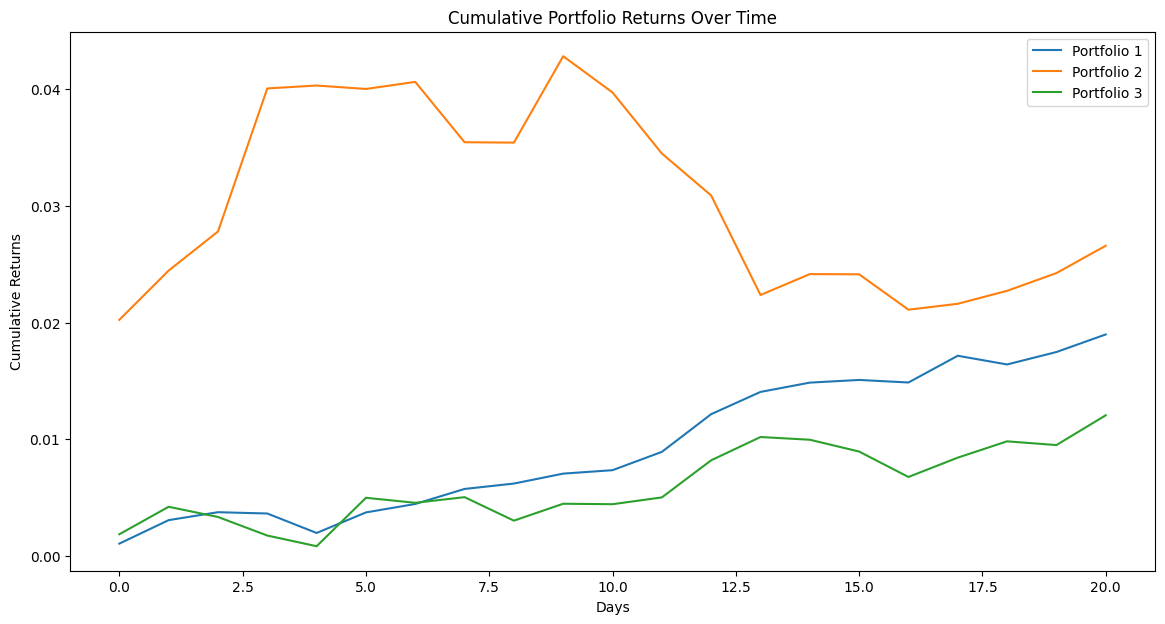

In [ ]:
import matplotlib.pyplot as plt

# Calculate daily portfolio returns
portfolio_returns_1 = np.einsum('ijk,ik->ij', r_dec, weights_gmv)
portfolio_returns_2 = np.einsum('ijk,ik->ij', r_dec, weights_m)
portfolio_returns_3 = np.einsum('ijk,ik->ij', r_dec, equal_weights_tiled)

# Calculate cumulative portfolio returns
cumulative_returns_1 = np.cumprod(1 + portfolio_returns_1, axis=1) - 1
cumulative_returns_2 = np.cumprod(1 + portfolio_returns_2, axis=1) - 1
cumulative_returns_3 = np.cumprod(1 + portfolio_returns_3, axis=1) - 1

# Plot cumulative portfolio returns
plt.figure(figsize=(14, 7))
for i, portfolio_returns in enumerate([cumulative_returns_1, cumulative_returns_2, cumulative_returns_3], start=1):
    plt.plot(portfolio_returns.mean(axis=0), label=f'Portfolio {i}')
plt.title('Cumulative Portfolio Returns Over Time')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()
